In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Orange_Telecom_Churn_Data.csv')

In [3]:
data.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
sns.set()

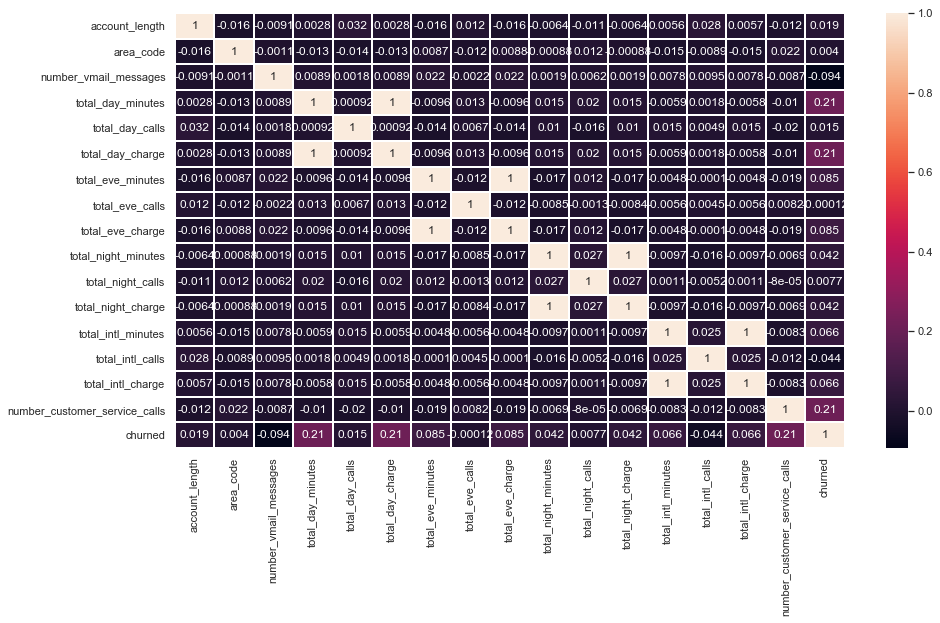

In [5]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, linewidths=1, linecolor='w')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 21 columns):
state                            4000 non-null object
account_length                   4000 non-null int64
area_code                        4000 non-null int64
phone_number                     4000 non-null object
intl_plan                        4000 non-null object
voice_mail_plan                  4000 non-null object
number_vmail_messages            4000 non-null int64
total_day_minutes                4000 non-null float64
total_day_calls                  4000 non-null int64
total_day_charge                 4000 non-null float64
total_eve_minutes                4000 non-null float64
total_eve_calls                  4000 non-null int64
total_eve_charge                 4000 non-null float64
total_night_minutes              4000 non-null float64
total_night_calls                4000 non-null int64
total_night_charge               4000 non-null float64
total_intl_minutes           

In [7]:
new_data = data[['total_day_charge', 'total_day_minutes', 'number_customer_service_calls', 'churned']]

In [8]:
new_data.head()

,total_day_charge,total_day_minutes,number_customer_service_calls,churned
0,45.07,265.1,1,False
1,27.47,161.6,1,False
2,41.38,243.4,0,False
3,50.90,299.4,2,False
4,28.34,166.7,3,False


In [9]:
def churnChanged(x):
    if x==False:
        x = 0
    else:
        x = 1
    return x

In [10]:
new_data['churned'] = new_data['churned'].apply(churnChanged)

c:\users\jatinder\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
new_data['churned'].head()

0    0
1    0
2    0
3    0
4    0
Name: churned, dtype: int64

In [12]:
new_data.head()

,total_day_charge,total_day_minutes,number_customer_service_calls,churned
0,45.07,265.1,1,0
1,27.47,161.6,1,0
2,41.38,243.4,0,0
3,50.90,299.4,2,0
4,28.34,166.7,3,0


In [13]:
new_data.churned.unique()

array([0, 1], dtype=int64)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
training_data = new_data[['total_day_charge', 'total_day_minutes', 'number_customer_service_calls']]

In [16]:
output_data = new_data['churned']

In [17]:
X, x_test, Y, y_test = train_test_split(training_data, output_data, test_size=0.3, random_state=42)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
model = KNeighborsClassifier(n_neighbors=15)

In [20]:
model.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [21]:
prediction = model.predict(x_test)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [23]:
confusion_matrix(y_test, prediction)

array([[1015,   18],
       [ 131,   36]], dtype=int64)

In [24]:
accuracy_score(y_test, prediction)

0.8758333333333334

## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logistic_model = LogisticRegression()

In [27]:
logistic_model.fit(X, Y)

c:\users\jatinder\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
logistic_prediction = logistic_model.predict(x_test)

In [30]:
logistic_accuracy = accuracy_score(y_test, logistic_prediction)
logistic_accuracy

0.8591666666666666

## Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
decision_model = DecisionTreeClassifier()

In [33]:
decision_model.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
decision_prediction = decision_model.predict(x_test)

In [36]:
decision_accuracy = accuracy_score(y_test, decision_prediction)
decision_accuracy

0.8266666666666667

## Ensemble Learning

In [37]:
from sklearn.ensemble import VotingClassifier

In [38]:
voting_model = VotingClassifier(estimators=[('knn', model), 
                                            ('lr', logistic_model), 
                                            ('dt', decision_model)], voting='hard')

In [39]:
voting_model.fit(X,Y)

c:\users\jatinder\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scalin...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [40]:
voting_prediction = voting_model.predict(x_test)

In [42]:
voting_accuracy = accuracy_score(y_test, voting_prediction)
voting_accuracy

0.8741666666666666